# Optical Communication project - Group 11

The parameters are given by:
1. The refractive index of the core $n_1 = 1.52$.
2. The refractive index of the cladding $n_2 = 1.49$.
3. The radius of the core is $a = 3 \times 10^{-6}$ m.
4. The wavelength is $\lambda = 810 \times 10^{-9}$ m.

In the following, this project is divided into 8 tasks for demonstration.

### 1. Calculate the V-parameter for the fibre.

The V-parameter is calculated by $$V=ak_0\sqrt{(n_1^2-n_2^2)}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special
from scipy.special import jv
from scipy.special import yv
from scipy.special import kv
from scipy.optimize import leastsq
import math

n_1 = 1.52              # Refractive index of the core, no unit
n_2 = 1.49              # Refractive index of the cladding, no unit
a = 3e-6                # Radius of the core, unit is [m]
lamda = 810e-9          # Wavelength, unit is [m]
k0 = 2 * np.pi / lamda  # Wave number in vacuum, unit is [m^-1]
V = (2 * np.pi * a) / lamda * (n_1**2 - n_2**2)**(1/2)  # V-parameter, unit is [m^-1]
print('The wave number in vacuum k0 = %.4f'%k0)
print('The V-parameter V = %.4f'%V)

The wave number in vacuum k0 = 7757018.8978
The V-parameter V = 6.9929


### 2. Our group are going to consider the {TE, TM, EH, HE} modes for all of the subsequent tasks.

### 3. Identify all the modes that the fibre supports and the propagation constant and effective index for each mode. Summarise the results as a table.

According to the theory, for TE modes (m=0) and EH modes (m>0) $$\frac{J_{m+1}(pa)}{paJ_m(pa)}=-\frac{K_{m+1}(qa)}{paK_m(qa)}=-\frac{K_{m+1}(\sqrt{V^2-(pa)^2})}{\sqrt{V^2-(pa)^2}K_m(\sqrt{V^2-(pa)^2})}$$

and for TM modes (m=0) and HE modes (m>0) $$\frac{J_{m-1}(pa)}{paJ_m(pa)}=\frac{K_{m-1}(qa)}{paK_m(qa)}=\frac{K_{m-1}(\sqrt{V^2-(pa)^2})}{\sqrt{V^2-(pa)^2}K_m(\sqrt{V^2-(pa)^2})}$$

In the following code, the left hand side and right hand side function are set as $${\rm LHS}={\rm f1}=\frac{J_{m-sign}(x)}{xJ_{m}(x)}$$


$${\rm RHS}={\rm f2}=sign\frac{K_{m-sign}(\sqrt{V^2-x^2})}{\sqrt{V^2-x^2}J_{m}(\sqrt{V^2-x^2})}$$

where the sign = -1 is for TE and EH modes, and sign = 1 is for TM and HE modes.

For each m, the intersections between curves of f1 and f2 are found and marked as red cross.

In [67]:
index=np.argwhere(np.diff(np.sign(f1(pa_points,5,1) - f2(pa_points,5,1)))).flatten()
print(index)
print(pa_points[index])

index=np.argwhere(np.diff(np.sign(f1(pa_points,5,-1) - f2(pa_points,5,-1)))).flatten()
print(index)
print(pa_points[index])

[9297 9998]
[6.50900987 6.99225349]
[9998]
[6.99225349]


<ipython-input-65-2bc043625040>:10: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-67-1dbf6b7248bd>:1: RuntimeWarning: invalid value encountered in sign
  index=np.argwhere(np.diff(np.sign(f1(pa_points,5,1) - f2(pa_points,5,1)))).flatten()
<ipython-input-67-1dbf6b7248bd>:5: RuntimeWarning: invalid value encountered in sign
  index=np.argwhere(np.diff(np.sign(f1(pa_points,5,-1) - f2(pa_points,5,-1)))).flatten()


<ipython-input-115-f2ed4c7b9d93>:10: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-115-f2ed4c7b9d93>:10: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-115-f2ed4c7b9d93>:10: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-115-f2ed4c7b9d93>:10: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-115-f2ed4c7b9d93>:10: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-115-f2ed4c7b9d93>:10: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-115-f2ed4c7b9d93>:10: RuntimeWarning: invalid value encountered in multiply
  return sign*kv(m-sign,x)/(x*kv(m,x))
<ipython-input-115-f2ed4c7b9d93>:10: RuntimeWarning: invalid value encountered in multiply

[3.3351816005640136, 5.99060873147656, 3.3351816005640136, 5.99060873147656, 2.099153343625749, 4.768367738977093, 4.454018109772493, 3.3351816005640136, 5.99060873147656, 5.5073651128966805, 4.454018109772493, 6.509009874375375, 5.5073651128966805, 6.509009874375375]
[11738140.040280802, 11620343.40562699, 11738140.040280802, 11620343.40562699, 11769888.019838668, 11683043.219706709, 11696820.761945672, 11738140.040280802, 11620343.40562699, 11646877.26516893, 11696820.761945672, 11589322.72592711, 11646877.26516893, 11589322.72592711]


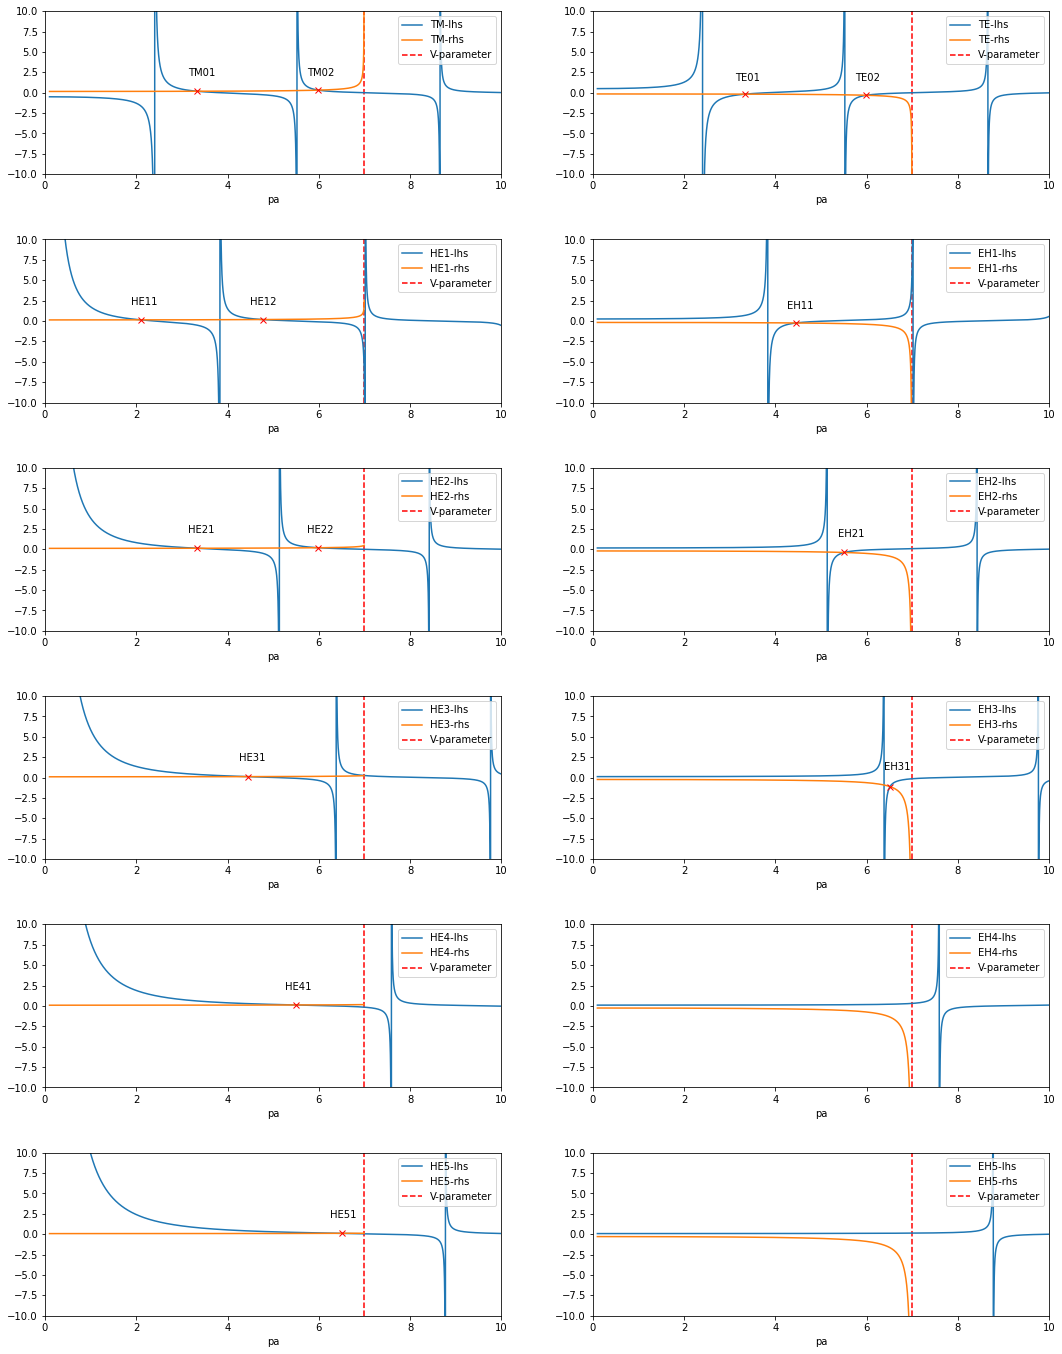

In [115]:
#defining functions to find modes
fig, axes = plt.subplots(6,2,figsize=(18, 24))
pa_points2 = np.linspace(0.1,10,10000)
pa_points = np.linspace(0.1,V,10000)

def f1(x,m,sign):# when sign=-1 TE and EH, when sign =1 TM HE
    return jv(m-sign,x)/(x*jv(m,x))
def f2(x,m,sign):
    x =  np.sqrt(V**2-x**2)
    return sign*kv(m-sign,x)/(x*kv(m,x))

## solution to func with sign=+1 corresponds to TM or HE modes
## solution to func with sign=-1 corresponds to TE or EH modes

####ploting graphs:
#ploting func 1 as lhs
axes[0,0].plot(pa_points2,f1(pa_points2,0,1),label='TM-lhs')
axes[0,1].plot(pa_points2,f1(pa_points2,0,-1),label='TE-lhs')
axes[1,0].plot(pa_points2,f1(pa_points2,1,1),label='HE1-lhs')
axes[1,1].plot(pa_points2,f1(pa_points2,1,-1),label='EH1-lhs')
axes[2,0].plot(pa_points2,f1(pa_points2,2,1),label='HE2-lhs')
axes[2,1].plot(pa_points2,f1(pa_points2,2,-1),label='EH2-lhs')
axes[3,0].plot(pa_points2,f1(pa_points2,3,1),label='HE3-lhs')
axes[3,1].plot(pa_points2,f1(pa_points2,3,-1),label='EH3-lhs')
axes[4,0].plot(pa_points2,f1(pa_points2,4,1),label='HE4-lhs')
axes[4,1].plot(pa_points2,f1(pa_points2,4,-1),label='EH4-lhs')
axes[5,0].plot(pa_points2,f1(pa_points2,5,1),label='HE5-lhs')
axes[5,1].plot(pa_points2,f1(pa_points2,5,-1),label='EH5-lhs')

#plotting func 2 as rhs
axes[0,0].plot(pa_points,f2(pa_points,0,1),label='TM-rhs')#m=0 
axes[0,1].plot(pa_points,f2(pa_points,0,-1),label='TE-rhs')#
axes[1,0].plot(pa_points,f2(pa_points,1,1),label='HE1-rhs')
axes[1,1].plot(pa_points,f2(pa_points,1,-1),label='EH1-rhs')
axes[2,0].plot(pa_points,f2(pa_points,2,1),label='HE2-rhs')
axes[2,1].plot(pa_points,f2(pa_points,2,-1),label='EH2-rhs')
axes[3,0].plot(pa_points,f2(pa_points,3,1),label='HE3-rhs')
axes[3,1].plot(pa_points,f2(pa_points,3,-1),label='EH3-rhs')
axes[4,0].plot(pa_points,f2(pa_points,4,1),label='HE4-rhs')
axes[4,1].plot(pa_points,f2(pa_points,4,-1),label='EH4-rhs')
axes[5,0].plot(pa_points,f2(pa_points,5,1),label='HE5-rhs')
axes[5,1].plot(pa_points,f2(pa_points,5,-1),label='EH5-rhs')

# labeling graphs for 6x2 axes
for i in range(6):
    for j in range(2):
        #axes[i,j].axvline(V, color='r', label='V')
        axes[i,j].vlines(V, -10, 10, linestyles='dashed', colors='red', label='V-parameter')
        axes[i,j].legend(loc='upper right')
        axes[i,j].set(xlabel='pa')
        axes[i,j].axis([0, 10, -10, 10])

# Change the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# Finding all indices of intersections (including asymptotes and V lines) for 12 axes
idx = []
order = 0
for i in range(0,11):
    # Reverse the 'sign' for TE/EH (sign = -1) and TM/HE modes (sign = 1)
    sign = (-1)**i
    # Increase m = 0 to m = 5
    if i == 0:
        order = 0
    elif i % 2 == 0: # Each m has two subplots
        order += 1
    # First it calculates f1 - f2 and the corresponding signs using np.sign.
    # Applying np.diff reveals all the positions, where the sign changes (e.g. the lines cross).
    # Using np.argwhere gives us the exact indices.
    idx += [np.argwhere(np.diff(np.sign(f1(pa_points,order,sign) - f2(pa_points,order,sign)))).flatten()]

# Graphically choose the correct indices of intersections for 12 axes
pa_index = [[idx[0][1],idx[0][3]], # TM01 & TM02
            [idx[1][1],idx[1][3]], # TE01 & TE02
            [idx[2][0],idx[2][2]], # HE11 & HE12
            [idx[3][1]],           # EH11
            [idx[4][0],idx[4][2]], # HE21 & HE22
            [idx[5][1]],           # EH21
            [idx[6][0]],           # HE31
            [idx[7][1]],           # EH31
            [idx[8][0]],[],        # HE41
            [idx[10][0]],[]]       # HE51

# Calculate bete from beta^2 = (n_1k_1)^2-p^2
def findbeta(pa):
    return np.sqrt((n_1 * k0)**2 - (pa / a)**2)

# Plot all intersection points:
ax = [axes[0,0],axes[0,1],axes[1,0],axes[1,1],axes[2,0],axes[2,1],axes[3,0],axes[3,1],axes[4,0],axes[4,1],axes[5,0],axes[5,1]]
labels = [['TM01','TM02'],['TE01','TE02'],['HE11','HE12'],['EH11','EH12'],['HE21','HE22'],['EH21','EH22'],
          ['HE31','HE32'],['EH31','EH32'],['HE41','HE42'],['EH41','EH42'],['HE51','HE52'],['EH51','EH52']]

betas = []
pa_vals = []
order = 0
count = 0
no_sol = 0
# Annotation postion, (0,0) means unused
pos = [[(3.125,2),(5.75,2)],[(3.125,1.5),(5.75,1.5)],[(1.875,2),(4.5,2)],[(4.25,1.5),(0,0)],[(3.125,2),(5.75,2)],
       [(5.375,1.5),(0,0)],[(4.25,2),(0,0)],[(6.375,1),(0,0)],[(5.25,2),(0,0)],[(0,0),(0,0)], [(6.25,2),(0,0)], [(0,0),(0,0)]]

for axcount,label,index,pos,i in zip(ax,labels,pa_index,pos,range(0,11)):
    # Reverse the 'sign' for TE/EH (sign = -1) and TM/HE modes (sign = 1)
    sign = (-1)**i
    # Increase m = 0 to m = 5
    if i == 0:
        order = 0
    elif i % 2 == 0: # Each m has two subplots
        order += 1
    if len(index) == 0: #
        no_sol += 1
    else:
        #plot first point
        axcount.plot(pa_points[index[0]],f1(pa_points[index[0]],order,sign),'xr')
        axcount.annotate(label[0], xy=(2, 0), xytext=pos[0]) 
        betas += [findbeta(pa_points[index[0]])]
        pa_vals += [pa_points[index[0]]]

    #second point exits
    if len(index) == 2:
        axcount.plot(pa_points[index[1]],f1(pa_points[index[1]],order,sign),'xr')
        axcount.annotate(label[1], xy=(0, 0), xytext=pos[1])
        betas += [findbeta(pa_points[index[1]])]
        pa_vals += [pa_points[index[1]]]
print(pa_vals)
print(betas)
plt.show() 

In [104]:
# Print all results
def results(label,pa,qa,beta,neff):
    print(label, " mode: ")
    print("pa=", pa)
    print("qa=", qa)
    print('beta=%.4f' %beta)
    print('neff=%.4f' %neff)
    print()
labels=[['TM01'],['TM02'],
        ['TE01'],['TE02'],
        ['HE11'],['HE12'],
        ['EH11'],
        ['HE21'],['HE22'],
        ['EH21'],
        ['HE31'],
        ['EH31'],
        ['HE41'],
        ['HE51']]

for i,j,label in zip(pa_vals,betas,labels):
    qa_val=np.sqrt(V**2-i**2)
    neff_val= j/k0
    results(label,i,qa_val,j,neff_val)

['TM01']  mode: 
pa= 3.3351816005640136
qa= 6.146365875948072
beta=11738140.0403
neff=1.5132

['TM02']  mode: 
pa= 5.99060873147656
qa= 3.6074723583301984
beta=11620343.4056
neff=1.4980

['TE01']  mode: 
pa= 3.3351816005640136
qa= 6.146365875948072
beta=11738140.0403
neff=1.5132

['TE02']  mode: 
pa= 5.99060873147656
qa= 3.6074723583301984
beta=11620343.4056
neff=1.4980

['HE11']  mode: 
pa= 2.099153343625749
qa= 6.670442641212387
beta=11769888.0198
neff=1.5173

['HE12']  mode: 
pa= 4.768367738977093
qa= 5.1150678290363
beta=11683043.2197
neff=1.5061

['EH11']  mode: 
pa= 4.454018109772493
qa= 5.391008483352471
beta=11696820.7619
neff=1.5079

['HE21']  mode: 
pa= 3.3351816005640136
qa= 6.146365875948072
beta=11738140.0403
neff=1.5132

['HE22']  mode: 
pa= 5.99060873147656
qa= 3.6074723583301984
beta=11620343.4056
neff=1.4980

['EH21']  mode: 
pa= 5.5073651128966805
qa= 4.309313089461959
beta=11646877.2652
neff=1.5015

['HE31']  mode: 
pa= 4.454018109772493
qa= 5.391008483352471
beta=11

m=0

In [119]:
#plotting e field for one mode
#input values for the choosen mode
a= 3*10**(-6)
##For TE and TM modes 𝑙 = 1, and for EH modes 𝑙 = 𝑚 + 1, For HE modes, 𝑙 = 𝑚 − 1

#each HE and EH mode has two degenerate modes (different direction)
#total number of mode 22, which matches the calcualtion for approximtion number of modes=20

#TE01  mode: 
# pa= 3.3356
# qa= 6.1461
# beta=11738126.8305
# neff=1.5132
# m,l=0,1

#['EH21']  mode: 
pa= 5.9895179581544
qa= 3.6092830892998102
beta=11738164.4790
neff=1.5132
m=2
l=3

#['EH11']  mode: 
pa= 4.768856742002962
qa= 5.1146119270197365
beta=11769940.4637
neff=1.5173
m=1
l=2

q=qa/a
p=pa/a

e0= 8.854188*10**(-12)
u0=1.2566*10**(-6)
w=2*np.pi*(3*10**8)/(8.1*10**(-7)) #angular freqeuncy  

In [120]:
# getting ABCD values 
n1,n2=n_1,n_2#notation change...

## for TE want A=C=0 so use ABCD func to plot field
##     TM want B=D=0 so use a different function where A=1 and solve for ACD
##     HE and EH will have two degenerate solutions one with B=1 and one with A=1


def ABCD(V,m,pa,qa,beta):# calculates ABCD to find TE or EH modes
    B=1#set this to unity

    #finding A:
    J_prime=-sp.special.jv(m+1,pa)+ (m/pa)*sp.special.jv(m,pa) #x=pa  (+-?)
    K_prime=-sp.special.kv(m+1,qa)+ (m/qa)*sp.special.kv(m,qa) #x=qa
    x1= (1j*beta*m*(1/(pa**2)+1/(qa**2)))/(e0*w)
    x2= n1**2*(J_prime)/(pa*sp.special.jv(m,pa)) + n2**2*(K_prime)/(qa*sp.special.kv(m,qa))
    A= -x1/x2
    
    #finding D:
    D= (sp.special.jv(m,pa)/sp.special.kv(m,qa))*B   
    #finding C:
    C= (sp.special.jv(m,pa)/sp.special.kv(m,qa))*A
    return A,B,C,D
def ABCD2(V,m,pa,qa,beta):# calculates ABCD to find TE or EH modes
    A=1#set this to unity

    #finding A:
    J_prime=-sp.special.jv(m+1,pa)+ (m/pa)*sp.special.jv(m,pa) #x=pa  (+-?)
    K_prime=-sp.special.kv(m+1,qa)+ (m/qa)*sp.special.kv(m,qa) #x=qa
    x1= (1j*beta*m*(1/(pa**2)+1/(qa**2)))/(e0*w) 
    x2= (J_prime)/(pa*sp.special.jv(m,pa)) + (K_prime)/(qa*sp.special.kv(m,qa))
    B= x1/x2
    
    #finding D:
    D= (sp.special.jv(m,pa)/sp.special.kv(m,qa))*B   
    #finding C:
    C= (sp.special.jv(m,pa)/sp.special.kv(m,qa))*A
    return A,B,C,D

    
A,B,C,D= ABCD(V,m,pa,qa,beta)
print(A,B,C,D)

(-0+275.75133206056455j) 1 -22673.15336111569j -82.22318707108141


In [121]:
np.abs(A)>B

True

In [122]:
#E field in polar coords
def Ezp(r):
    if r<a: #in core
        return A* sp.special.jv(m,p*r)
    else: #in clad
        return C* sp.special.kv(m,q*r)
def Er(r):
    if r<a:#in core
        J_diff= -sp.special.jv(m+1,p*r)+(m/(p*r))*sp.special.jv(m,p*r)
        return (-1j*beta/(p**2))*(A*p*J_diff+1j*w*u0*m*B*sp.special.jv(m,p*r)/(beta*r))
    else:#in clad
        K_diff= -sp.special.kv(m+1,q*r)+(m/(q*r))*sp.special.kv(m,q*r)
        return (1j*beta/(q**2))*(C*q*K_diff+1j*w*u0*m*D*sp.special.kv(m,q*r)/(beta*r)) 
def Ephi(r):
    if r<a:#in core
        J_diff= -sp.special.jv(m+1,p*r)+(m/(p*r))*sp.special.jv(m,p*r)
        return (-1j*beta/(p**2))*(1j*m*A*sp.special.jv(m,p*r)/r-w*u0*p*B*J_diff/(beta))
    else: #in clad
        K_diff= -sp.special.kv(m+1,q*r)+(m/(q*r))*sp.special.kv(m,q*r)
        return (1j*beta/(q**2))*(1j*m*C*sp.special.kv(m,q*r)/r-w*u0*q*D*K_diff/(beta))

In [123]:
#E field y pol  modes in carteisan
##need to check thisl=m+-1
def Exy(r):
    return 0
def Eyy(r):
    if r<a:
        return A*sp.special.jv(l,p*r)
    else:
        return B*sp.special.kv(l,q*r)
def Ezy(r,x,y):
    phi= np.arctan(x/y)
    if r<a:
        return p*A*(sp.special.jv(l+1,p*r)*np.exp(1j*phi)+sp.special.jv(l-1,p*r)*np.exp(-1j*phi))/(2*beta)
    else:
        return q*B*(sp.special.kv(l+1,q*r)*np.exp(1j*phi)+sp.special.kv(l-1,q*r)*np.exp(-1j*phi))/(2*beta)

In [124]:
#E field x polarised
def Eyx(r):
    return 0
    # if r<a:#in core
    #     return 0
    # else: #in clad
    #     return 0
def Exx(r):
    if r<a:
        return A*sp.special.jv(l,p*r)
    else:
        return B*sp.special.kv(l,q*r)
def Ezx(r,x,y):
    phi= np.arctan(x/y)
    if r<a:
        return 1j*p*A*(sp.special.jv(l+1,p*r)*np.exp(1j*phi)-sp.special.jv(l-1,p*r)*np.exp(-1j*phi))/(2*beta)
    else:
        return 1j*q*B*(sp.special.kv(l+1,q*r)*np.exp(1j*phi)-sp.special.kv(l-1,q*r)*np.exp(-1j*phi))/(2*beta)

NameError: name 'I' is not defined

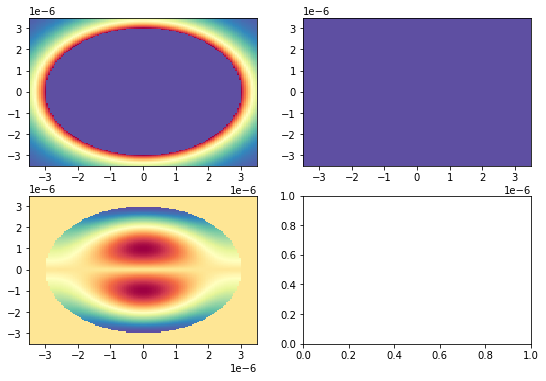

In [126]:
#2d plots

a= 3*10**(-6) # real size
#a=1#normalised core
X = np.linspace(-(a+5*10**(-7)), a+5*10**(-7), 128)# mainly core with some clad around
Y ,Z = X,X # give Y and Z same length- symmetric
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)  

#for cartesian coords for plotting LPm odes
Ex_vals,Ey_vals,Ez_vals=[],[],[]
for i,j,k in zip(R,X,Y):
    Ex_vals_sub,Ey_vals_sub,Ez_vals_sub=[],[],[]
    for i2,j2,k2 in zip(i,j,k):
        Ez_vals_sub+= [Ezx(i2,j2,k2)]#[Ezp(i2)] #
        Ex_vals_sub+= [Exx(i2)]
        Ey_vals_sub+= [Eyx(i2)]
    #Ez_vals+= [Ez(i,i,i)]
    Ez_vals+= [Ez_vals_sub]
    Ex_vals+= [Ex_vals_sub]
    Ey_vals+= [Ey_vals_sub]

Er_vals,Ephi_vals,Ezp_vals=[],[],[]
#polar coords for plotting TEM  modes
for i,j,k in zip(R,X,Y):
    Er_vals_sub,Ephi_vals_sub,Ezp_vals_sub=[],[],[]
    for i2,j2,k2 in zip(i,j,k):
        Ezp_vals_sub+= [Ezp(i2)] #[Ezx(i2,j2,k2)]#
        Er_vals_sub+= [Er(i2)]
        Ephi_vals_sub+= [Ephi(i2)]
    #Ez_vals+= [Ez(i,i,i)]
    Ezp_vals+= [Ezp_vals_sub]
    Er_vals+= [Er_vals_sub]
    Ephi_vals+= [Ephi_vals_sub]    

    
#I=np.abs(Ex_vals*np.conj(Ex_vals)+Ey_vals*np.conj(Ey_vals)+Ez_vals*np.conj(Ez_vals))*3*10**(8)*e0/2 
#for polar the intensity is |E(r)|^2 times phase conj
phi= np.arctan(X/Y)
extra_phase_sq= np.cos((m*phi-beta*Z))**2 +np.sin((m*phi-beta*Z))**2 
Ip= np.array((Er_vals*np.conj(Er_vals)+Ephi_vals*np.conj(Ephi_vals)+Ezp_vals*np.conj(Ezp_vals)).real)*extra_phase_sq*3*10**(8)*e0/2 

#ET= np.array(np.array(Ex_vals)+np.array(Ey_vals)+np.array(Ez_vals)).real

fig,axes = plt.subplots(ncols=2, nrows=2, figsize=(9,6))
cm=plt.cm.get_cmap('Spectral_r')
#plt.subplots_adjust(wspace=1, hspace=2)

#uncomment for cartesian coords plots for LP
im1 = axes[0][0].pcolormesh(X, Y, np.array(Ex_vals).real, cmap=cm)
im2 = axes[0][1].pcolormesh(X, Y, np.array(Ey_vals).real, cmap=cm)
im3 = axes[1][0].pcolormesh(X, Y, np.array(Ez_vals).real, cmap=cm)
im4 = axes[1][1].pcolormesh(X, Y, I, cmap=cm)
axes[0][0].set_title("$Ex$")
axes[0][1].set_title("$Ey$")
axes[1][0].set_title("$Ez$")
axes[1][1].set_title("$I$")

##uncomment this bit of code for spherical coords plots for TEM
# #plotting real part
# im1 = axes[0][0].pcolormesh(X, Y, np.array(Er_vals).real, cmap=cm)
# im2 = axes[0][1].pcolormesh(X, Y, np.array(Ephi_vals).real, cmap=cm)
# im3 = axes[1][0].pcolormesh(X, Y, np.array(Ezp_vals).real, cmap=cm)
# im4 = axes[1][1].pcolormesh(X, Y, Ip, cmap=cm)

#plotting imaginary part
# im1 = axes[0][0].pcolormesh(X, Y, np.array(Er_vals).imag, cmap=cm)
# im2 = axes[0][1].pcolormesh(X, Y, np.array(Ephi_vals).imag, cmap=cm)
# im3 = axes[1][0].pcolormesh(X, Y, np.array(Ezp_vals).imag, cmap=cm)
# im4 = axes[1][1].pcolormesh(X, Y, Ip, cmap=cm)

axes[0][0].set_title("$Er$")
axes[0][1].set_title("$Ephi$")
axes[1][0].set_title("$Ez$")
axes[1][1].set_title("$I$")




fig.colorbar(im1, ax=axes[0, 0])
fig.colorbar(im2, ax=axes[0, 1])
fig.colorbar(im3, ax=axes[1, 0])
fig.colorbar(im4, ax=axes[1, 1])


waveguide dispersion 
neff_0= beta/k0
k0=810nm
neff_1= beta/k1
k1=820nm

neff_1=
D=-lamba/c (d2n/dlambda2)


neffdirectly= 
neff^2= n1^2 enery in core + n2^2 enery in clad

for he01
neff=1.5132

In [144]:
#calculating dispersion
lamda_0 = 809.5e-9          # Wavelength, unit is [m]
lamda_1 = 810e-9
lamda_2 = 810.5e-9
k_0 = 2 * np.pi / lamda_0
k_1 = 2 * np.pi / lamda_1
k_2 = 2 * np.pi / lamda_2
neff_0= beta/k_0
neff_1= beta/k_1
neff_2= beta/k_2

D = -lamda_1/3e8*((neff_0-neff_1)/(lamda_0-lamda_1)-(neff_1-neff_2)/(lamda_1-lamda_2))/(lamda_0-lamda_1) # unit is s/m^2
D = D * 10**6 # unit is ps/(nm km)
print(D)

dlam= k1-k0
dneff=np.abs(neff_0-neff_1)
dlam2=k2-k0
dneff2=np.abs(neff_2-neff_0)

D=-(lamda/(3*10**8))*(dneff/(dlam**2))# units are s/(m m)
D2= -(lamda/(3*10**8))*(dneff2/(dlam2**2))# units are s/(m m)
D=D*10**(12)*10**(9)*10**(-3)#convert to units ps/(nm km)
D2=D2*10**(12)*10**(9)*10**(-3)#convert to units ps/(nm km)


# ##method 2
# dndl1= (neff_1-neff_0)/(dlam2-dlam)
# dndl2=(neff_2-neff_0)/(dlam2-dlam)

# D= -lamda/(3*10**8)*(dndl1-dndl2/(0.5e-9))
# D=D*10**(12)*10**(12)*10**(-3)#convert to units ps/(ns km)

# print(D)
#finding max bit rate if fibre length=1km  
L=1#km
dl=1#nm
deltaT=D2*L*dl# in ps
Max_bit_rate=1/deltaT

print(Max_bit_rate)


-2.552289515734068e-07
-4538766.488225237


In [133]:
#find energy in core and clad
energy_Core=0
energy_Clad=0

vals=range(0,len(X))
for i in vals:
    for j in vals:
        if i<a and j<a:#in core
        #print(np.array(I)[i][j])
            energy_Core+= Ip[i][j]*X[i,j]*Y[i,j] #energy= I A #assuming no time involved
        else: #in clad
            #print('y')
            energy_Clad+= Ip[i][j]*X[i,j]*Y[i,j]
print(energy_Core,energy_Clad)

#calcualting approximate neff value using energy
neff= (n_1**2*energy_Core+ n_2**2*(1-energy_Core))**0.5

print(neff)

6.206329513902169e-12 -6.206329513571051e-12
1.490000000000188


In [409]:
print(n1,n2)

1.52 1.49
